<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Exploratory_analysis_Pancreatic_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Basic Plots

Arguably the most important plots, that is, plots that data scientists most frequently use are:
* The **histogram** for displaying basic distribution information of **numeric columns**.
* The **bar plot** for displaying basic mode information for **categorical columns**.
* The **scatter plot** for displaying basic relationships between two variables and the two variables are **numeric**.

#**Data**
The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1.

* Creatinine is a protein that is often used as an indicator of kidney function.
* LYVE1 is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
* REG1B is a protein that may be associated with pancreas regeneration
* TFF1 is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

**Age** and **sex**, both included in the dataset, may also play a role in who gets pancreatic cancer. The dataset includes a few other biomarkers as well, but these were not measured in all patients (they were collected partly to measure how various blood biomarkers compared to urine biomarkers).


## Load Data

In [12]:
# get data
df = pd.read_csv('https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/Pancreatic%20Cancer%202020.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# Cleaning Dataset and Data Preprocessing

In [13]:
df = df.drop(['sample_origin','patient_cohort','sample_id', 'stage', 'benign_sample_diagnosis'], axis = 1)

In [ ]:
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [15]:
for c in df.columns:
    df[c].fillna(0,inplace = True)

df.isnull().sum()

age              0
sex              0
diagnosis        0
plasma_CA19_9    0
creatinine       0
LYVE1            0
REG1B            0
TFF1             0
REG1A            0
dtype: int64

# Data Exploration

[Seaborn](http://seaborn.pydata.org) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.  Seaborn integrates nicely with Pandas dataframes. We will use this library to explore our dataset.

### Number of participants by gender

Seaborn also supports bar charts called [`countplots`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot). Here I am using the bar chart to see if the data is balanced with respect to gender. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


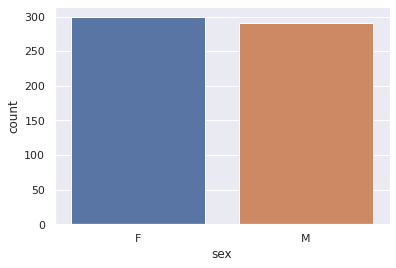

In [ ]:
sns.countplot(df['sex'])

This shows the gender split of candidates in this study. They are roughly equal.

##Bar graph of Diagnosis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


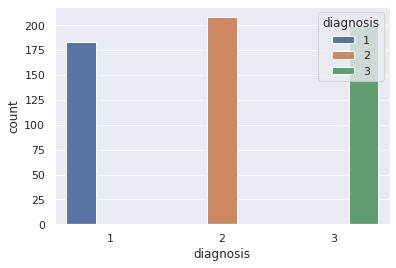

In [17]:
sns.countplot(df['diagnosis'], hue= 'diagnosis', data=df)

## Distribution of participants by age


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


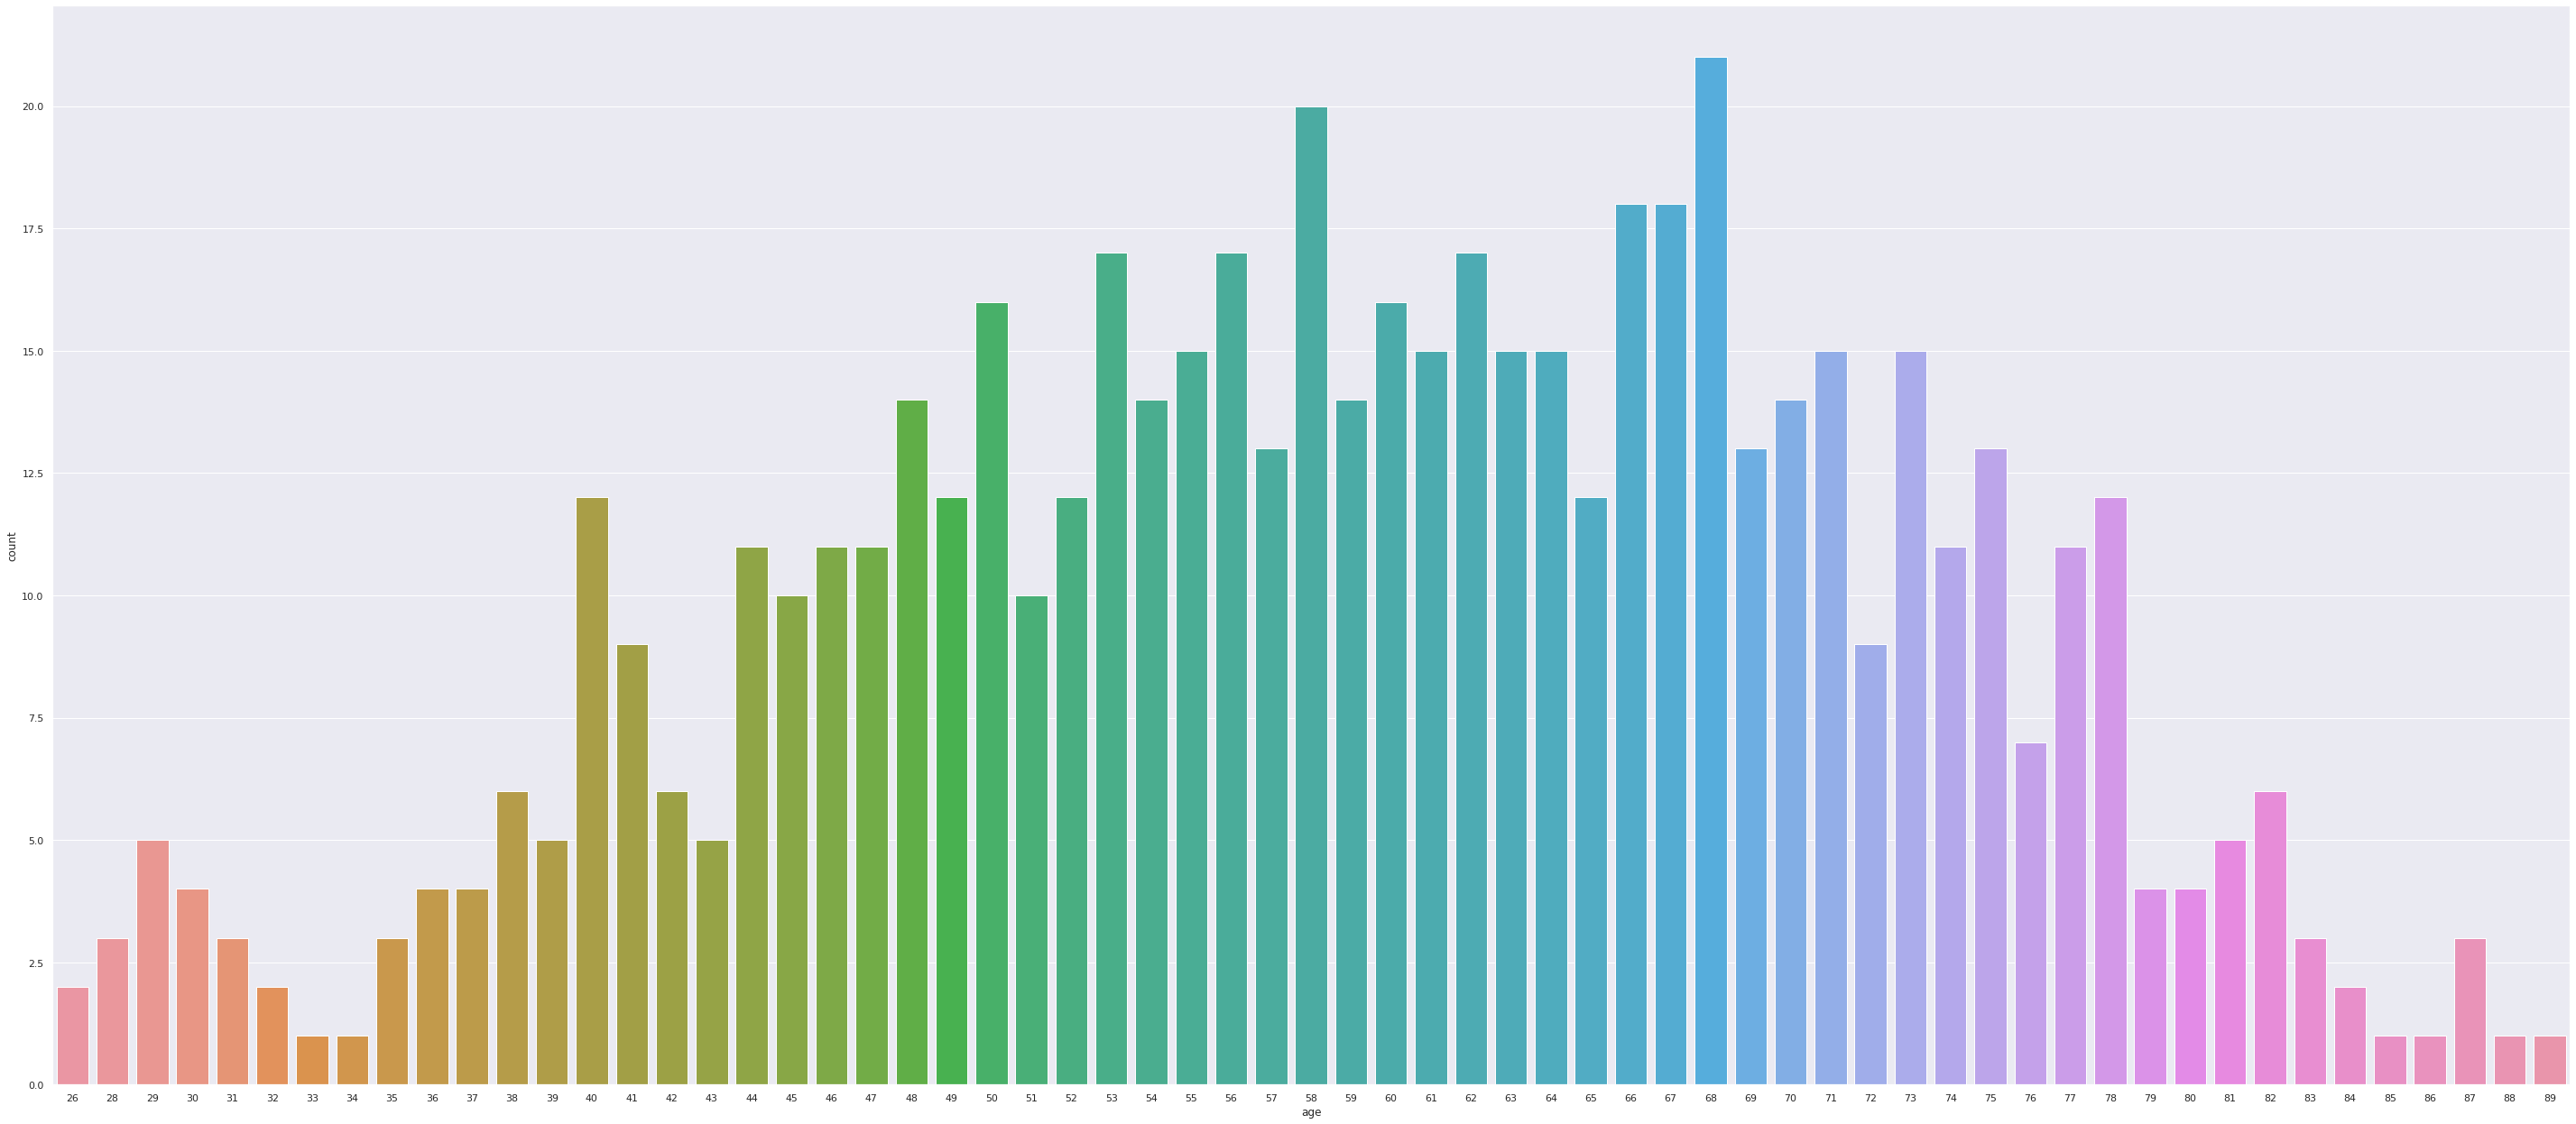

In [18]:
plt.figure(figsize=(50,22))
sns.countplot(df['age'])
plt.show()

The age range is huge. The youngest participant is 26 years old while the oldest participant is 89 years old. We can see the age variable has a normal distribution. 

## Percentage of candidates by diagnosis
The same information as the bar chart can be displayed in a visually appealing pie chart. The only caveat here is that we want to get rid of the column/series name because the package displays it in kind of a strange fashion in basic plots.

In [21]:
labels = list(df['diagnosis'].unique())
labels

[1, 2, 3]

([<matplotlib.patches.Wedge at 0x7fabfbe08730>,
 [Text(0.4915454972454779, 0.9840645426686687, 'control'),
  Text(-1.0902681136410408, -0.14599808347237445, 'pancreatic disease'),
  Text(0.6178071993575627, -0.9101177200900799, 'cancer')],
 [Text(0.26811572577026066, 0.5367624778192738, '35%'),
  Text(-0.5946916983496586, -0.07963531825765878, '34%'),
  Text(0.3369857451041251, -0.4964278473218616, '31%')])

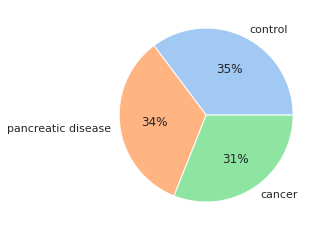

In [ ]:
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(df['diagnosis'].value_counts(),
        labels =['control', 'pancreatic disease', 'cancer'], 
        colors=palette_color, autopct='%.0f%%')

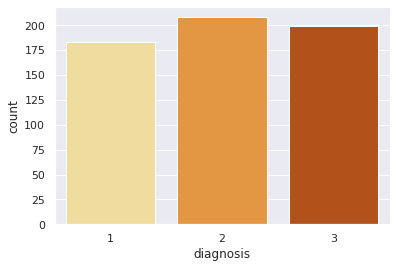

In [ ]:
sns.countplot(x="diagnosis", data=df, palette="YlOrBr")
plt.show()

# Numerical 

##Distribution of creatinine 
In the Seaborn world this is done with [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot). Notice that we can plot the density plot and the histogram right on top of each other.  Try this with different bins (e.g. bins=10).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


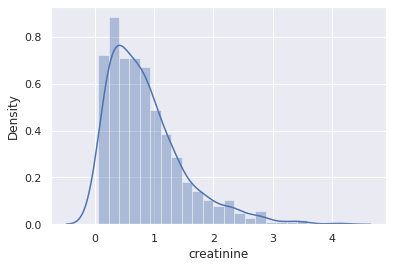

In [26]:
sns.distplot(df['creatinine'], hist=True, kde=True, bins=None)

## Distribution of the variables

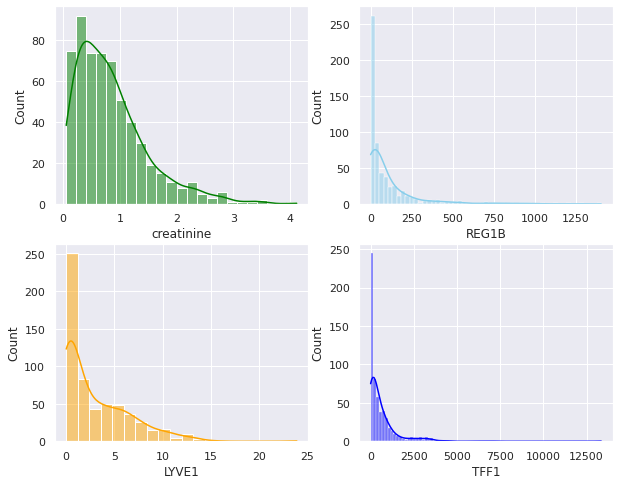

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="creatinine", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="REG1B", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LYVE1", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="TFF1", kde=True, ax=axs[1, 1], color ='blue')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


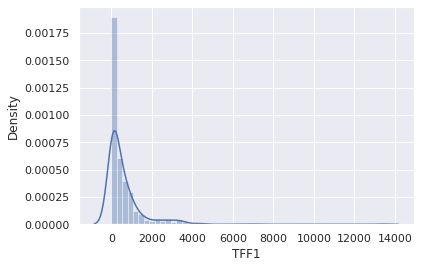

In [27]:
sns.distplot(df['TFF1'], hist=True, bins=None)

## Correlation between variables

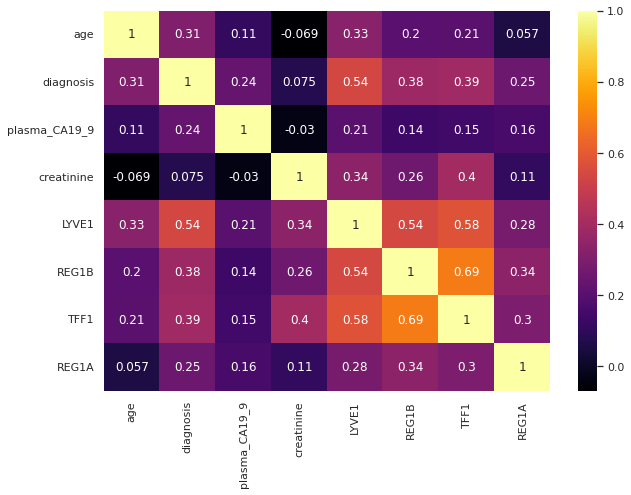

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

##Diagnosis by Gender

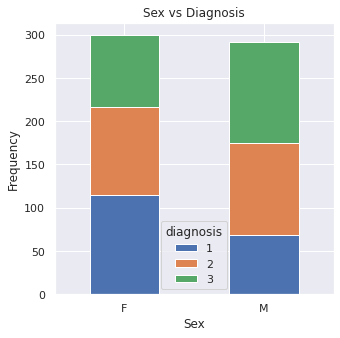

In [ ]:
pd.crosstab(df.sex,df.diagnosis).plot(kind="bar", stacked=True, figsize=(5,5))
plt.title('Sex vs Diagnosis')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Scatter matrix 
Scatter matrix shows the relationship between the variables. 

Plasma CA 19 9 is protein that is present once a person has a pancreatic disease, the more there is, the more likely it is cancer.

Creatinine is a protein that is often used as an indicator of kidney function.

LYVE1 is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis

REG1B is a protein that may be associated with pancreas regeneration
REG1A is maybe related? (required further research)

TFF1 is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

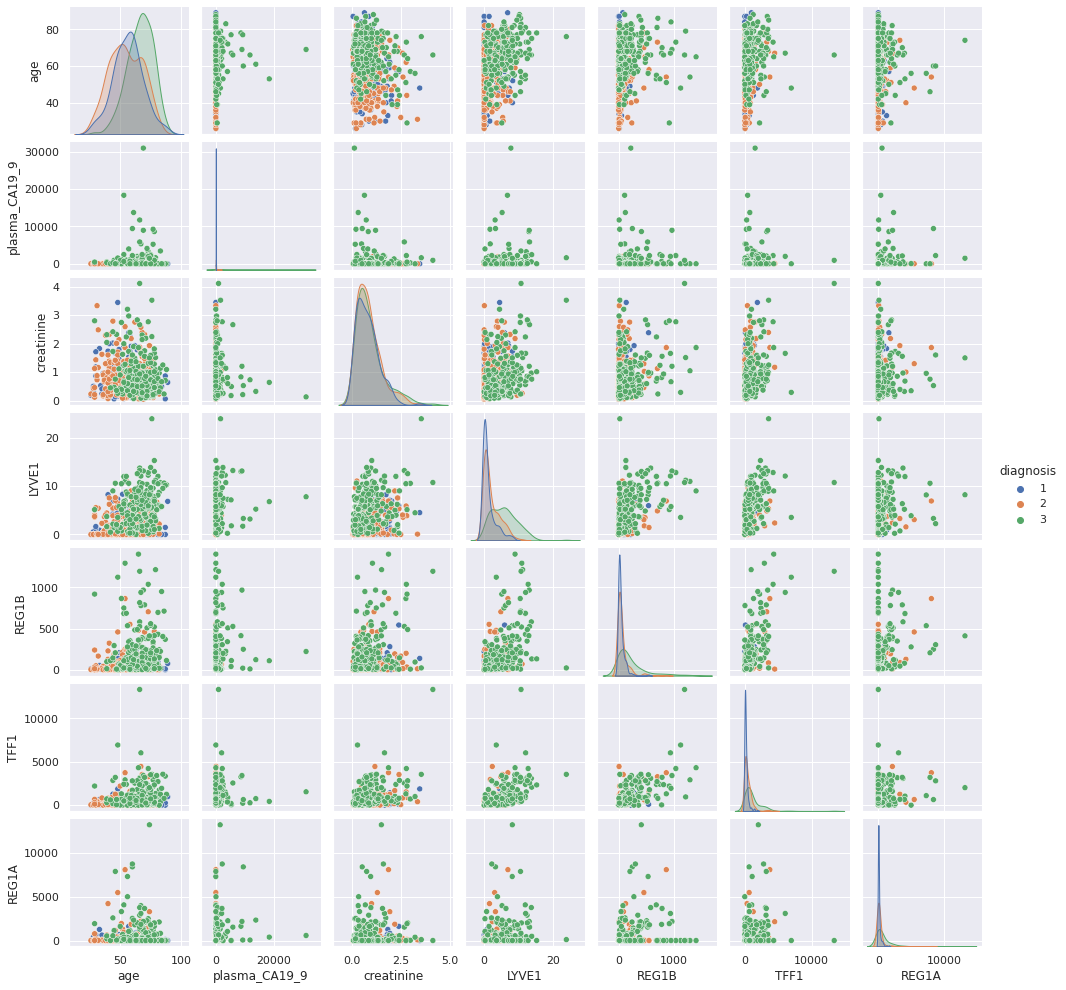

In [ ]:
sns.set()
sns.pairplot(df, hue= 'diagnosis', height=2, palette="deep")

In [ ]:
def fn_color(x):
  if x == 1:
    return 'blue'
  elif x == 2: 
    return 'green'
  else:
    return 'red'

color_vector = df['diagnosis'].map(fn_color)

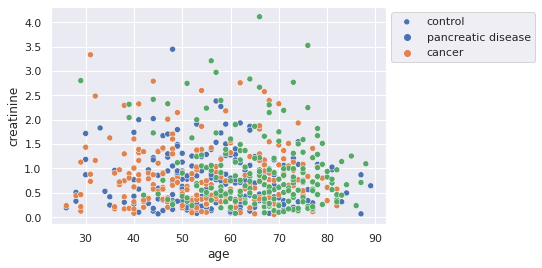

In [28]:
sns.scatterplot(data=df, x="age", y="creatinine", hue="diagnosis", palette="deep")
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.show ()

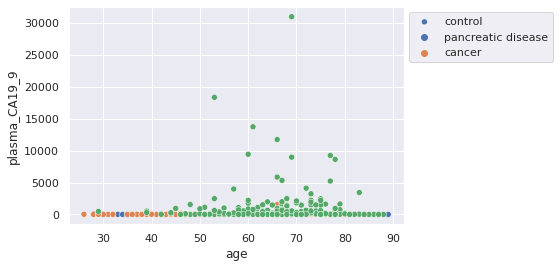

In [29]:
sns.scatterplot(data=df, x="age", y="plasma_CA19_9", hue="diagnosis", palette="deep")
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.show()

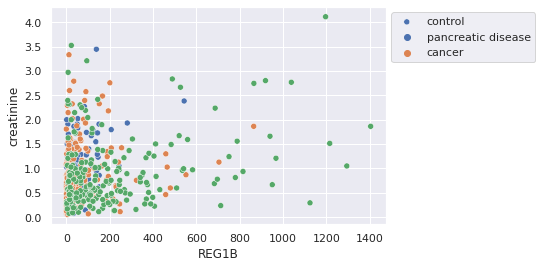

In [30]:
sns.scatterplot(data = df, x = 'REG1B' , y = "creatinine", hue = 'diagnosis' , palette = 'deep')
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.show()

Example of zooming in on plots

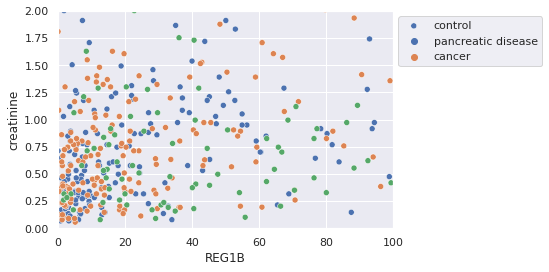

In [32]:
sns.scatterplot(data = df, x = 'REG1B' , y = "creatinine", hue = 'diagnosis' , palette = 'deep')
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.ylim(0, 2)
plt.xlim(0, 100)
plt.show()

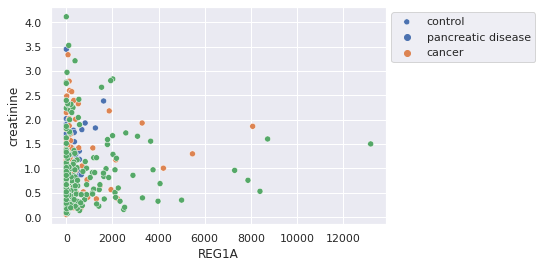

In [33]:
sns.scatterplot(data = df, x = 'REG1A' , y = "creatinine", hue = 'diagnosis' , palette = 'deep')
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.show()

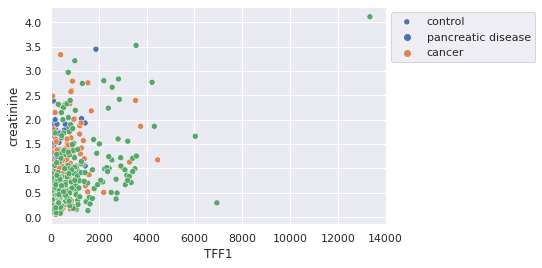

In [34]:
sns.scatterplot(data = df, x = 'TFF1' , y = "creatinine", hue = 'diagnosis' , palette = 'deep')
plt.legend(labels=['control', 'pancreatic disease', 'cancer'], loc = 2, bbox_to_anchor = (1,1))
plt.xlim(0, None)
plt.show()

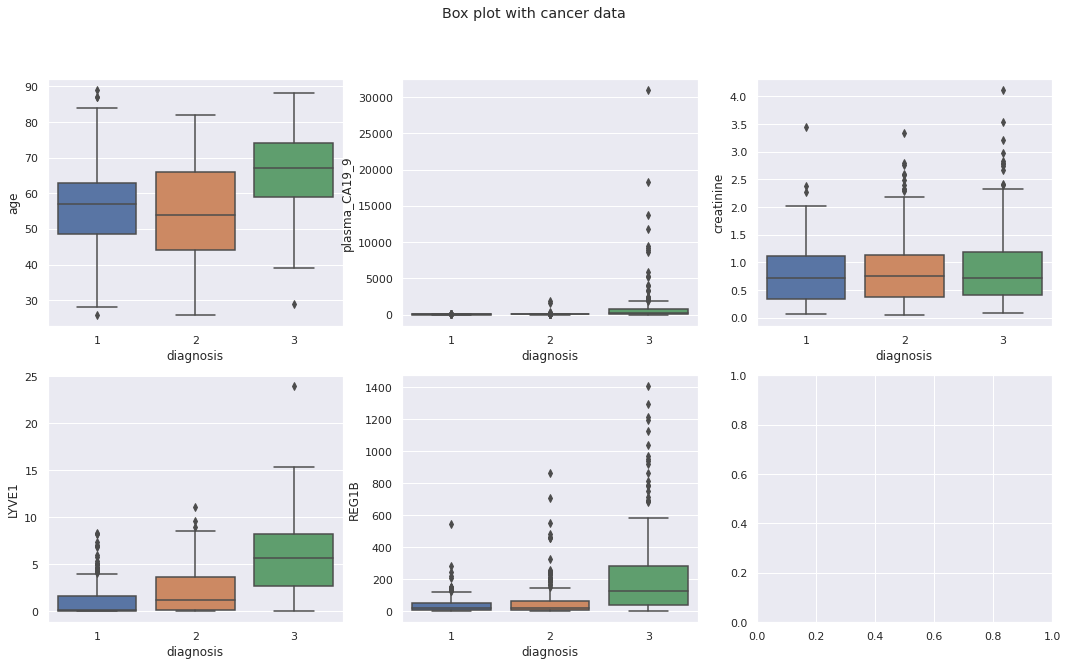

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) #How many plot? What Size?
fig.suptitle('Box plot with cancer data') # Title of the graph
 
sns.boxplot(ax=axes[0, 0], data=df, x='diagnosis', y='age') #boxplot of the diagnosis wrt radius
sns.boxplot(ax=axes[0, 1], data=df, x='diagnosis', y='plasma_CA19_9')
sns.boxplot(ax=axes[0, 2], data=df, x='diagnosis', y='creatinine')
sns.boxplot(ax=axes[1, 0], data=df, x='diagnosis', y='LYVE1')
sns.boxplot(ax=axes[1, 1], data=df, x='diagnosis', y='REG1B')

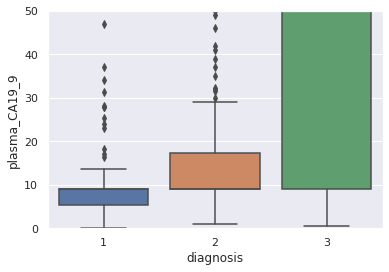

In [ ]:
ax = sns.boxplot(x="diagnosis", y="plasma_CA19_9", data=df)
plt.ylim(0, 50)
plt.show()

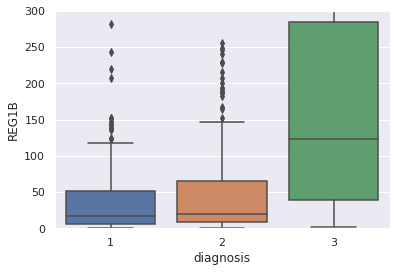

In [ ]:
ax = sns.boxplot(x="diagnosis", y="REG1B", data=df)
plt.ylim(0, 300)
plt.show()